# Reconocimiento de Patrones
[Curso de Reconocimiento de Patrones]

Departamento Electrónica

Universidad Popular del Cesar

José Ramón Iglesias

---

# Técnicas de Evaluación de Clasificadores






# Setup inicial

Liberías necesarias para que funcione el algoritmo.

## Setup de librerías

In [ ]:
import numpy as np
from   sklearn.svm import SVC
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import confusion_matrix, accuracy_score
from   sklearn.model_selection import cross_val_score
from   sklearn.model_selection import StratifiedKFold,KFold,LeaveOneOut
from   IPython.display import clear_output

## Carga de base de datos

En estos ejemplos usaremos las siguientes bases de datos de características para probar clasificadores:


* F2:  Training data: 800 samples with 2 features. Testing data: 400 samples with 2 features. Classes: 0...1

* G2: Training data: 800 samples with 2 features
 Testing data: 200 samples with 2 features. Classes: 1...2

* G3: Training data: 1200 samples with 2 features. Testing data: 600 samples with 2 features. Classes: 1...3

* G3x4: Training data: 3600 samples with 4 features. Testing data: 900 samples with 4 features. Classes: 1...3



* G4: Training data: 800 samples with 2 features .Testing data: 400 samples with 2 features. Classes: 1...4

* P2: Training data: 1052 samples with 2 features. Testing data: 262 samples with 2 features. Classes: 0...1



In [ ]:
!wget https://www.dropbox.com/s/4knnagipqowhn7s/F2.zip?dl=0
!unzip F2

!wget https://www.dropbox.com/s/l7nvckkpl821b0q/G2.zip?dl=0
!unzip G2

!wget https://www.dropbox.com/s/wnm9zcfz9fd0g6e/G3.zip?dl=0
!unzip G3

!wget https://www.dropbox.com/s/vvejmyj5vjk7ewi/G3x4.zip?dl=0
!unzip G3x4  

!wget https://www.dropbox.com/s/3r634emj92o0tyy/G4.zip?dl=0
!unzip G4

!wget https://www.dropbox.com/s/q5dqgrlzj8cbc8p/P2.zip?dl=0https://www.dropbox.com/s/d3648jkq62vxm63/P2.zip
!unzip P2

clear_output()

print('Datos F2, F40, G3, G3x4, G4 y P2 cargados.')


Datos F2, F40, G3, G3x4, G4 y P2 cargados.


## Funciones necesarias

In [1]:
def load_features(prefix,merge=0):
    Xtrain  = np.load(prefix+'_Xtrain.npy')            # training samples
    Xtest = np.load(prefix+'_Xtest.npy')             # testing samples
    ytrain  = np.ravel(np.load(prefix+'_dtrain.npy'))  # training labels
    ytest = np.ravel(np.load(prefix+'_dtest.npy'))   # testing labels
    if merge==0:
      print('Training data: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
      print(' Testing data: '+str(Xtest.shape[0])+' samples with '+str(Xtest.shape[1])+' features')
      print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
      return Xtrain,ytrain,Xtest,ytest
    else:
      X = np.concatenate((Xtrain,Xtest),axis=0)
      y = np.concatenate((ytrain,ytest),axis=0)
      print('   Whole data: '+str(X.shape[0]) +' samples with '+str(X.shape[1]) +' features')
      print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
      return X,y

# Training/Testing Data

In [ ]:
data = 'G3x4' # <= puede ser 'G2','G3','G4','P2','F2' (ver explicación más arriba)
print('Cargando '+data+'...')
X,y   = load_features(data + '/' + data,merge=1)   # load whole data

Cargando G3x4...
   Whole data: 4500 samples with 4 features
      Classes: 1...3


           x_0       x_1       x_2       x_3  clases
0     1.278433 -0.689998  0.947501 -0.528813     1.0
1     1.217223 -1.098643  1.061521 -0.517122     1.0
2     0.811685 -0.497013  0.605744  0.363438     1.0
3     0.266625  0.117383  0.490073  0.625220     1.0
4     0.557257 -0.635766  0.805885 -0.535321     1.0
...        ...       ...       ...       ...     ...
4495  0.600787  0.400442 -0.222601  0.345612     3.0
4496  1.409913  0.414913  0.309939  1.188627     3.0
4497  0.667786 -0.185863 -0.237184  1.039033     3.0
4498  0.231914  0.167424 -0.302872  0.359629     3.0
4499  1.143884 -0.802325 -0.659553 -0.210865     3.0

[4500 rows x 5 columns]


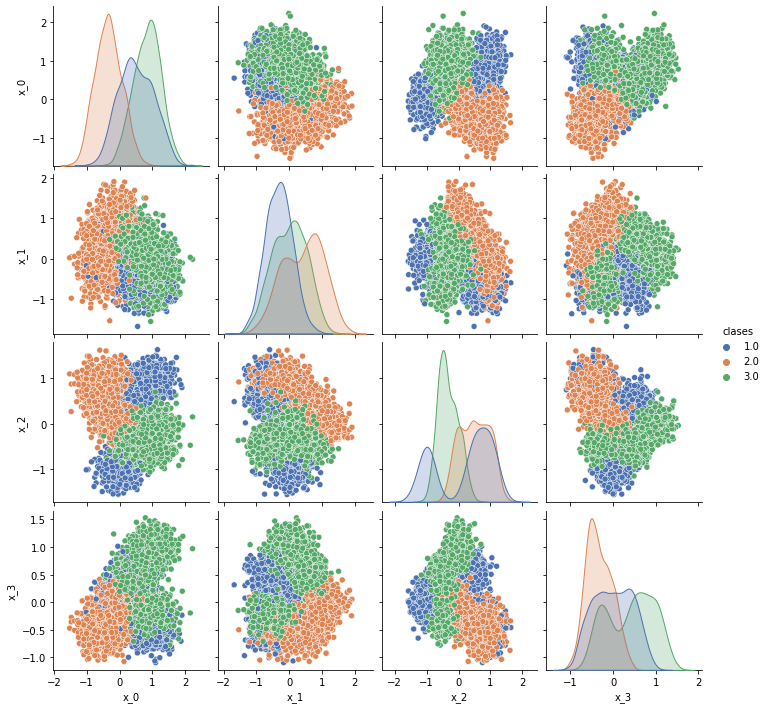

In [ ]:
# Visualización para G3x4

import pandas as pd
import seaborn as sns
df1 = pd.DataFrame(X, columns = ['x_0','x_1','x_2','x_3'])
df2 = pd.DataFrame(y,columns = ['clases'])
df = pd.concat([df1, df2], axis=1)
print(df)

sns.pairplot(df,hue='clases',palette="deep")

# Hold-Out

Referencia para separar Training/Testing: [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) 

In [ ]:
# 1. Definición de Training y Testing
t = 0.9 # proporción de datos para el Testing
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle=True, test_size=t)             # No Estratificado
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle=True, test_size=t, stratify=y)  # Estratificado

# 2. Definición del Clasificador
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)

# 3. Entrenamiento
clf.fit(Xtrain, ytrain)

# 4. Clasificación del Testing 
ypred  = clf.predict(Xtest)

# 5. Evaluación de Desempeño
acc = accuracy_score(ytest,ypred) 
acc_st = "{:.2f}".format(acc*100)
print('Testing Accuracy = '+str(acc_st))
C   = confusion_matrix(ytest,ypred) 
print('Confusion Matrix:')
print(C)

Testing Accuracy = 96.44
Confusion Matrix:
[[1279    6   65]
 [  17 1315   18]
 [  34    4 1312]]


# Validación Cruzada

Referencia para definir los "Folds" de la validación cruzada: [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [ ]:
# 1. Definición del Clasificador
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)

# 2. Definición de los "Folds"
nfolds = 10
skf = StratifiedKFold(n_splits=nfolds,shuffle=True) # Estratificado
#skf = KFold(n_splits=nfolds,shuffle=True)          # No-Estratificado

# 3. Evaluación de la Validación Cruzada
scores = cross_val_score(clf, X, y, cv=skf)

# 4. Promedio de los "Accuracies"
acc = np.mean(scores)
std = np.std(scores)
acc_st = "{:.2f} +/- {:.2f}".format(acc*100,std*100)
print('Accuracy (CV'+str(nfolds)+')= '+str(acc_st))


Accuracy (CV10)= 97.42 +/- 0.75


# Validación Cruzada (código alternativo)

En este ejemplo, se tiene acceso a cada uno de los "folds"

In [ ]:
# 1. Definición del Clasificador
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)

# 2. Definición de los "Folds"
nfolds = 10
skf = StratifiedKFold(n_splits=nfolds,shuffle=True) # Estratificado
#skf = KFold(n_splits=nfolds,shuffle=True)          # No-Estratificado

# 3. Evaluación de la Validación Cruzada
scores = np.zeros((nfolds,))
for i,(train_index, test_index) in enumerate(skf.split(X,y)):
    Xi, Xti   = X[train_index], X[test_index]
    yi, yti   = y[train_index], y[test_index]
    clf.fit(Xi, yi)
    ypredi    = clf.predict(Xti)
    scores[i] = accuracy_score(yti,ypredi)

# 4. Promedio de los "Accuracies"
acc = np.mean(scores)
std = np.std(scores)
acc_st = "{:.2f} +/- {:.2f}".format(acc*100,std*100)
print('Accuracy (CV'+str(nfolds)+')= '+str(acc_st))



Accuracy (CV10)= 97.40 +/- 0.52


# Leave-one Out

Referencia para leave-one out: [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html)

<font color='red'>Advertencia: La ejecución de Leave-One Out puede demorar varios minutos.</font>


In [ ]:
# 1. Definición del Clasificador
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)

# 2. Definición de los "Folds"
skf = LeaveOneOut()

# 3. Evaluación de la Validación Cruzada
scores = cross_val_score(clf, X, y, cv=skf)

# 4. Promedio de los "Accuracies"
acc = np.mean(scores)
std = np.std(scores)
acc_st = "{:.2f} +/- {:.2f}".format(acc*100,std*100)
print('Accuracy (LO)= '+str(acc_st))


KeyboardInterrupt: ignored

# Funciones holdout & crossval

In [ ]:
def holdout(clf,Xtrain,ytrain,Xtest,ytest,show=1):
  clf.fit(Xtrain, ytrain)
  ypred  = clf.predict(Xtest)
  acc = accuracy_score(ytest,ypred) 
  C   = confusion_matrix(ytest,ypred) 
  if show:
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    print('Confusion Matrix:')
    print(C)
  return acc,C,ypred

def crossval(clf,X,y,nfolds=10,show=1):
  scores = cross_val_score(clf, X, y, cv=nfolds)
  acc = np.mean(scores)
  if show:
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
  return acc

In [ ]:
# HOLD-OUT
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)
acc,C,__ = holdout(clf,Xtrain,ytrain,Xtest,ytest)

Accuracy = 96.44
Confusion Matrix:
[[1279    6   65]
 [  17 1315   18]
 [  34    4 1312]]


In [ ]:
# CROSSVAL
clf = SVC(kernel = "rbf", gamma=0.5,C=0.3)
acc = crossval(clf,X,y)

Accuracy = 97.49


# Evaluación de Modelos

En estos ejemplos se muestran las funciones necesarias para implementar estarategias de selección de modelos, es decir, estrategias para escoger el mejor selector de características y el mejor clasificar. [(Ver más)](https://github.com/domingomery/patrones/blob/master/clases/Cap05_Evaluacion/presentations/PAT05_ModelSelector.pdf)

## Setup

In [ ]:
import numpy as np
from   sklearn.svm import SVC
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import confusion_matrix, accuracy_score
from   sklearn.model_selection import cross_val_score
from   sklearn.model_selection import StratifiedKFold,KFold,LeaveOneOut
from   IPython.display import clear_output

## Funciones

In [ ]:
# Instalación de PyBalu

!pip install scipy==1.2
!pip3 install pybalu==0.2.5
clear_output()

print('PyBalu library installed.')


In [ ]:
from   pybalu.feature_selection import clean,sfs
from   pybalu.feature_transformation import normalize

# Clase necesaria para llamar SFS de Balu
class sfsbalu():
  def __init__(self, p, show=0):
    self.p = p
    self.show = show
  def fit(self,X,y):
    self.sel = sfs(X,y,self.p,show=self.show)
    self.m   = X.shape[1]
  def get_support(self):
    s = np.zeros((self.m,))
    s[self.sel] = 1
    return s

# Normalización MinMax: cada columna es normalizada para que tenga minimo 0 y máximo 1
def minmax(X):
    ma = X.max(0)
    mi = X.min(0)
    md    = ma-mi    
    a     = 1/ md
    b     = -mi/md
    return X * a + b, a, b

def holdout(clf,Xtrain,ytrain,Xtest,ytest,show=1):
  clf.fit(Xtrain, ytrain)
  ypred  = clf.predict(Xtest)
  acc = accuracy_score(ytest,ypred) 
  C   = confusion_matrix(ytest,ypred) 
  if show:
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    print('Confusion Matrix:')
    print(C)
  return acc,C,ypred

def crossval(clf,X,y,nfolds=10,show=1):
  scores = cross_val_score(clf, X, y, cv=nfolds)
  acc = np.mean(scores)
  if show:
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
  return acc


## Nuevos datos

(las siguientes celdas funcionan con estos datos, ya que hay que hacer selección de caracyerísticas).

In [ ]:
!wget https://www.dropbox.com/s/knq4187tuj2vwsn/Features_Letras.zip
!unzip Features_Letras
clear_output()
print('Base de datos descargada.')

In [ ]:
X = np.load('Letras_X.npy')            # features
y = np.load('Letras_y.npy')            # labels
y = y.astype(int)
print('Features: '+str(X.shape[0]) +' samples with '+str(X.shape[1]) +' features')
print(' Classes: '+str(int(np.min(y)))+'...'+str(int(np.max(y))))

## Separación Training/Testing

... + Clean + Normalización

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.10)
sclean = clean(Xtrain)            # índice de características seleccionadas
Xtrain_clean = Xtrain[:,sclean]   # nuevo training
Xtest_clean  = Xtest[:,sclean]    # nuevo testing
Xtrain, a, b = minmax(Xtrain_clean)
Xtest        = Xtest_clean * a + b

print('Training: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
print(' Testing: '+str(Xtest.shape[0]) +' samples with '+str(Xtest.shape[1]) +' features')


## Listado de Selectores de Características

Se cuenta con un conjunto de $n$ selectores $(g_1, \cdots g_n)$:

In [ ]:
# Lista de selectores a probar

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

nsel = 8 # número a características a seleccionar

g = [sfsbalu(p=nsel),
     SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=nsel),
     SelectFromModel(LogisticRegression(penalty="l2"), max_features=nsel),
     RFE(SVC(kernel="linear"),nsel, step=1)
     ]

n = len(g)


## Listado de Clasificadores

Se cuenta con un conjunto de $q$ clasificadores $(h_1, \cdots h_q)$:

In [ ]:
# Conjunto de clasificadores a evaluar

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

h = [SVC(kernel = "linear"),
     SVC(kernel = "rbf", gamma=0.5,C=0.3),
     KNeighborsClassifier(n_neighbors=5),
     KNeighborsClassifier(n_neighbors=7),
     LinearDiscriminantAnalysis(),
     ]

q = len(h)

## Evaluación de selector $g_i$ con el clasificador $h_k$

In [ ]:
# Selección de características usando g[i]
i = 0
model = g[i]
model.fit(Xtrain, ytrain)  
sel = np.nonzero(model.get_support())[0]
print('selector g['+str(i)+']:'+str(sel)+'<= columnas seleccionadas')

In [ ]:
# Hold-out con clasificador h[k]
k = 4
clf = h[k]
print('Clasificador h['+str(k)+']:')
acc,C,_ = holdout(clf,Xtrain[:,sel],ytrain,Xtest[:,sel],ytest)


... con estas funciones es muy fácil implementar estrategias que busquen la mejor combinación $(g_i,h_k)$, no olvidar que para evaluar el accuracy $(\eta)$ es posible usar `holdout` o bien `crossval`.